In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, pairwise_distances

Proposed Dissimilarity Measure

In [2]:
#calculate mean, standard deviation and weights for each dimension 
def calc_parameter_proposed_dissimilarity(data):
    N, K = data.shape
    mu = np.zeros(K)
    s_dev = np.zeros(K)
    weight = np.zeros(K)
    su=0

    for l in range(K):
        x1 = data[:, l]
        x1 = np.array(x1).reshape(N, 1)
        dx = cdist(x1, x1, metric='minkowski', p=1)
        out = dx[np.tril_indices(N, k = -1)]
        mu[l] = np.mean(out)
        s_dev[l] = np.std(out)
        weight[l] = 1 - np.exp(-(s_dev[l]/mu[l]))
        su = su+ weight[l]

    weight /= su
    return mu, s_dev, weight

In [3]:
# proposed dissimilarity measure between two data points
def proposed_dissimilarity(x, y):
    d_xy = np.abs(x - y)
    d = np.sum( (weight * d_xy * (mu + 2 * k_1 * s_dev) ) / ( (d_xy + k_1 * s_dev) * (mu + k_1 * s_dev)) );
    return d

In [4]:
def proposed_dissimilarity_affinity(X):
    return pairwise_distances(X, metric=proposed_dissimilarity)

Clustering on synthetic data

shape of data: (1000, 2)
#clusters: 4


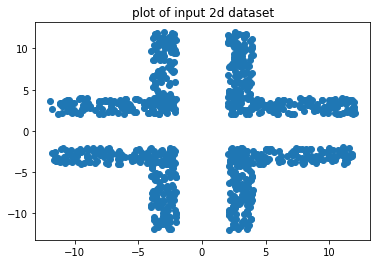

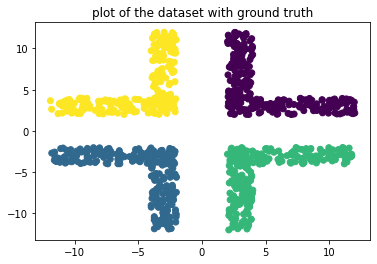

In [5]:
# load dataset
file_path = "corners.txt"
sep='\t'
df = pd.read_csv(file_path, header=None, sep=sep)
df_X, y = df.iloc[:, :-1], df.iloc[:, -1]
X = np.array(df_X)
_K = len(set(y))
print("shape of data:", X.shape)
print("#clusters:", _K)

plt.scatter(X[:,0], X[:, 1])
plt.title("plot of input 2d dataset")
plt.show()

plt.scatter(X[:,0], X[:, 1], c=y)
plt.title("plot of the dataset with ground truth")
plt.show()

In [6]:
# set value of k1 and calculate parameters - mean, standard deviations and weights
k_1 = 2
mu, s_dev, weight = calc_parameter_proposed_dissimilarity(X)

# performing hierarchical clustering with average linkage using proposed disimilarity measure
clustering_ = AgglomerativeClustering(n_clusters=_K, affinity=proposed_dissimilarity_affinity, linkage='average').fit(X)

# computing ari
ari = adjusted_rand_score(clustering_.labels_, y)
print("ari:",ari)

ari: 1.0


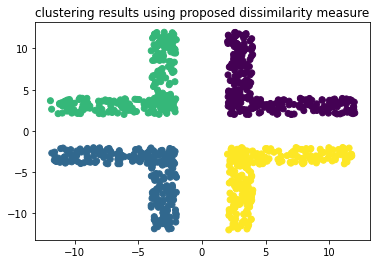

In [7]:
#plot results
plt.scatter(X[:,0], X[:, 1], c=clustering_.labels_)
plt.title("clustering results using proposed dissimilarity measure")
plt.show()

Clustering on real dataset

In [8]:
# load dataset
file_path = "iris.txt"
sep = ','
df = pd.read_csv(file_path, header=None, sep=sep)
df_X, y = df.iloc[:, :-1], df.iloc[:, -1]
X = np.array(df_X)
_K = len(set(y))
print("shape of data:", X.shape)
print("#clusters:", _K)

shape of data: (150, 4)
#clusters: 3


In [9]:
k_1 = 2.5
mu, s_dev, weight = calc_parameter_proposed_dissimilarity(X)
clustering_ = AgglomerativeClustering(n_clusters=_K, affinity=proposed_dissimilarity_affinity, linkage='complete').fit(X)
ari = adjusted_rand_score(clustering_.labels_, y)
print("ari:", round(ari, 4))

ari: 0.7184
